In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os 
from scipy import stats

In [2]:
dfs = []
for dirname, _, filenames in os.walk('C:/Users/patel/OneDrive/Documents/internship/intership_datascince-main/gearbox'):
    for filename in tqdm.tqdm(filenames, leave=False):
        
        # the gearbox state is in the filename prefix (h = healthy, b = broken tooth)
        state = filename[0]
        
        # the load is in the filename suffix
        load = int(filename.split('.')[0][5:])
        
        # read in the file
        df = pd.read_csv(os.path.join(dirname, filename))
        
        # include the healthy/broken state
        df['state'] = state
        
        # include the load
        df['load'] = load
        
        # append to a list
        dfs.append(df)

# concatenate all the datasets and reset the index
df = pd.concat(dfs).reset_index().rename(columns={'index':'sample_index'})

In [3]:
df.sample(3, random_state=42)

,sample_index,a1,a2,a3,a4,state,load
1583597,81134,5.48556,-1.65806,1.07116,0.476970,h,50
1197075,10004,-7.97032,3.21429,-4.96447,-0.314574,h,20
17675,17675,-2.77924,-1.95478,-1.11393,5.013970,b,0


In [4]:
df= df.melt(
    id_vars=['sample_index','state','load'],
    value_vars=['a1','a2','a3','a4'],
    var_name='sensor',
    value_name='reading'
)

In [5]:
df.sample(5,random_state=42)

,sample_index,state,load,sensor,reading
264040,64104,b,20,a1,2.038720
10077,10077,b,0,a1,-0.119862
5325806,96497,h,20,a3,2.481130
6306664,43371,b,20,a4,-0.318986
6400111,22386,b,30,a4,-4.506430


<Axes: xlabel='count', ylabel='load'>

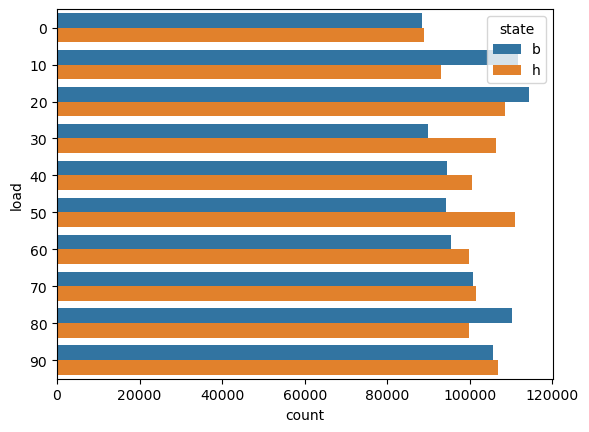

In [6]:
sns.countplot(
data=df[df.sensor=='a1'],
y="load",
hue='state')

<Axes: xlabel='count', ylabel='load'>

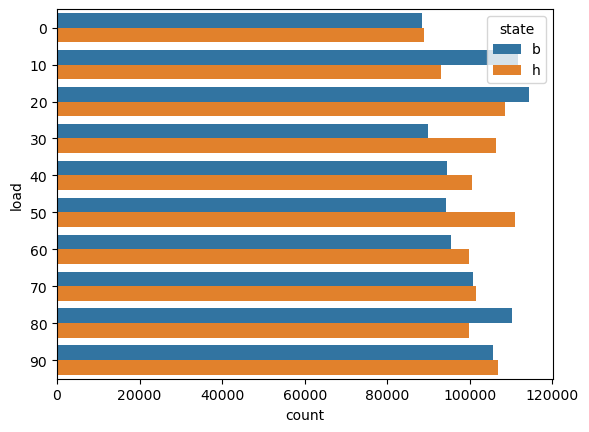

In [7]:
sns.countplot(
data=df[df.sensor=='a2'],
y="load",
hue='state')

<Axes: xlabel='count', ylabel='load'>

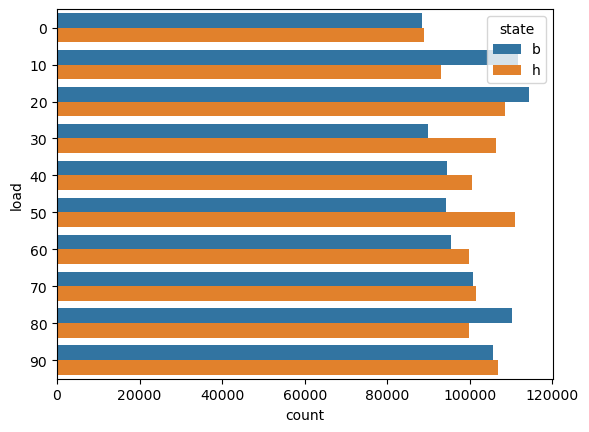

In [8]:
sns.countplot(
data=df[df.sensor=='a3'],
y="load",
hue='state')

<Axes: xlabel='count', ylabel='load'>

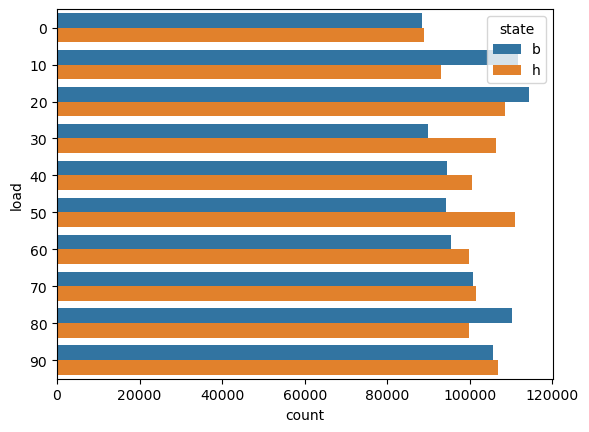

In [9]:
sns.countplot(
data=df[df.sensor=='a4'],
y="load",
hue='state')

In [10]:
# Descriptive statistics for each sensor reading across different loads and fault categories
print(df.groupby(['state', 'load'])['reading'].describe())

               count      mean       std      min       25%       50%  \
state load                                                              
b     0     353280.0  0.001409  3.490388 -23.4500 -1.881153  0.026041   
      10    446464.0 -0.003481  3.566907 -24.8317 -1.913403  0.020558   
      20    457728.0  0.000941  3.760544 -24.6333 -2.005202  0.044579   
      30    359424.0 -0.006175  4.003762 -25.8561 -2.199035  0.055258   
      40    377856.0  0.006641  4.219035 -30.7304 -2.373600  0.091404   
      50    376832.0 -0.004280  4.416441 -28.5795 -2.560950  0.070382   
      60    381952.0  0.005897  4.685642 -32.5023 -2.731492  0.094262   
      70    403456.0 -0.002332  4.769994 -29.2109 -2.832670  0.061817   
      80    441340.0  0.006499  4.906220 -29.7037 -2.892138  0.083871   
      90    422912.0  0.001294  4.936338 -28.5369 -2.967097  0.047669   
h     0     355328.0 -0.015366  4.315884 -38.4144 -2.000752 -0.008352   
      10    371712.0  0.015465  4.366229 -43.7555 -

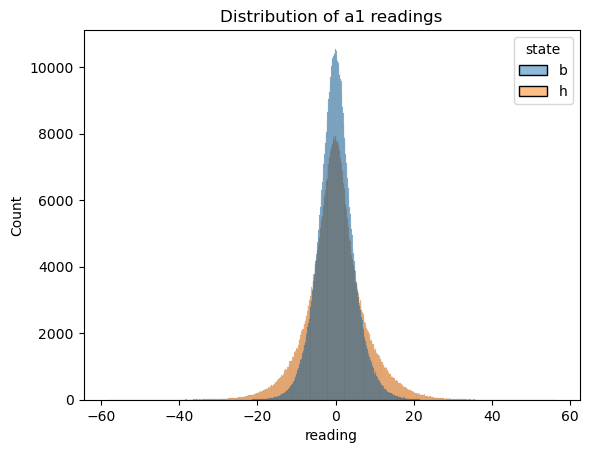

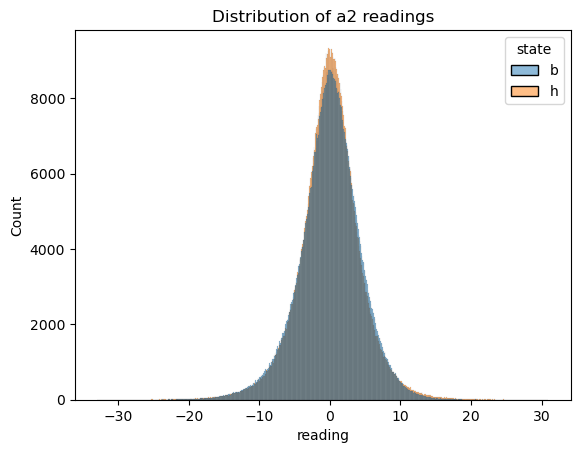

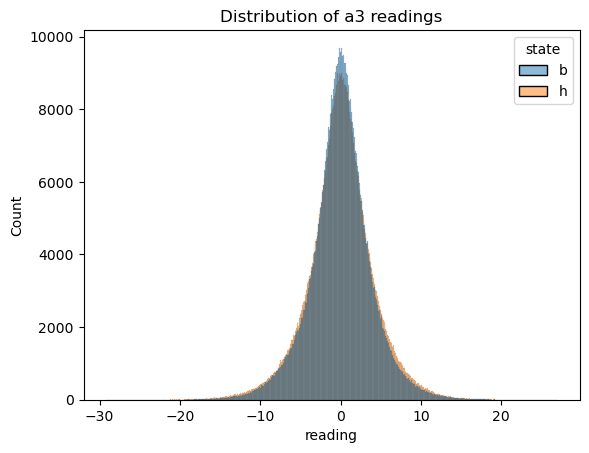

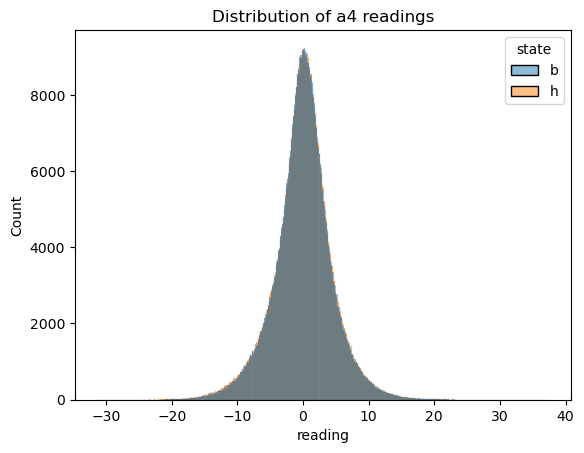

In [11]:
# Histograms for sensor readings (one plot per sensor)
for sensor in df['sensor'].unique():
    sns.histplot(data=df[df['sensor'] == sensor], x="reading", hue="state")
    plt.title(f"Distribution of {sensor} readings")
    plt.show()

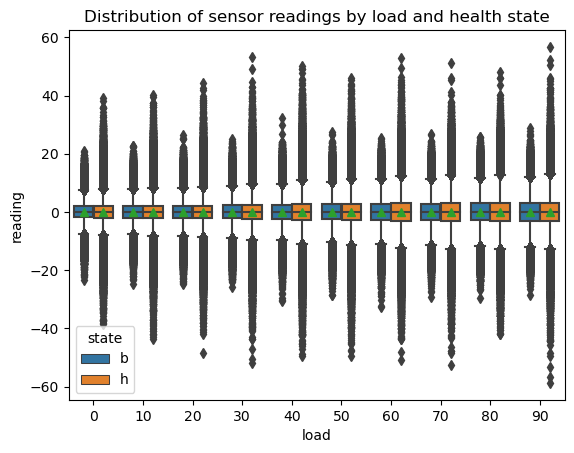

In [12]:
# Boxplots for sensor readings across load and fault category
sns.boxplot(
    x = "load",
    y = "reading",
    hue = "state",
    showmeans=True,
    data=df
)
plt.title("Distribution of sensor readings by load and health state")
plt.show()

In [13]:
def rdg(df, state=None, load=None, sensor=None):
    df_st = df[df.state==state] if state is not None else df
    df_lo = df_st[df_st.load==load] if load is not None else df_st
    df_se = df_lo[df_lo.sensor==sensor] if sensor is not None else df_lo
    return df_se

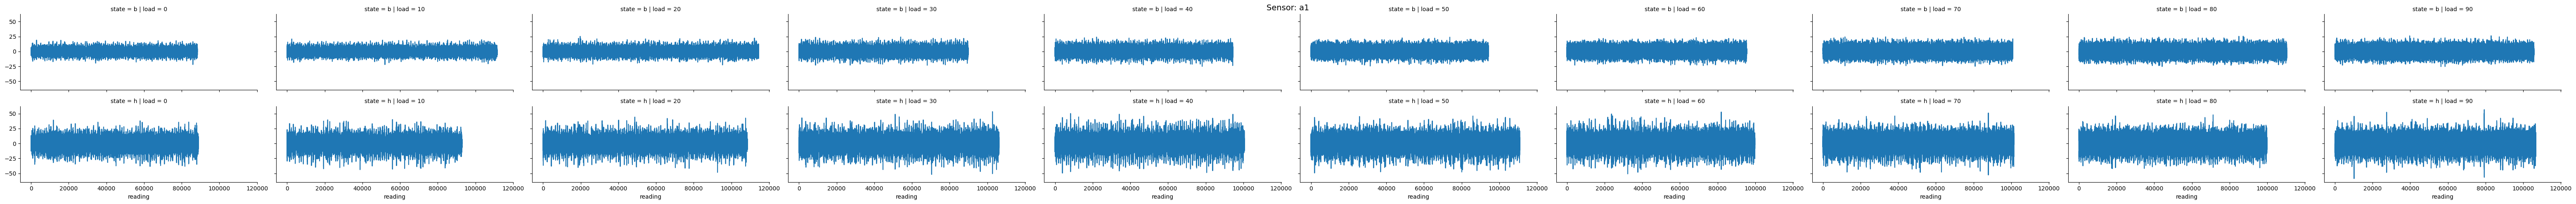

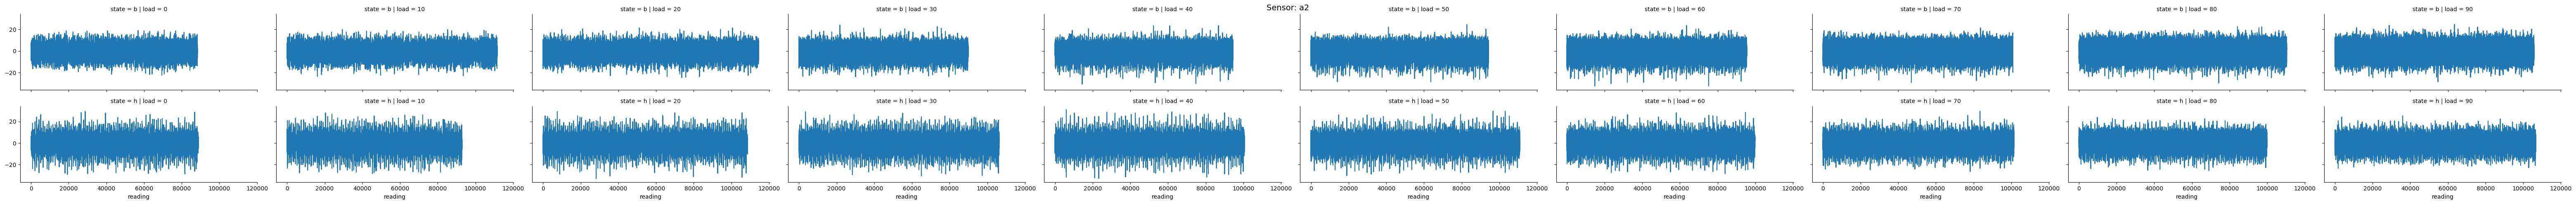

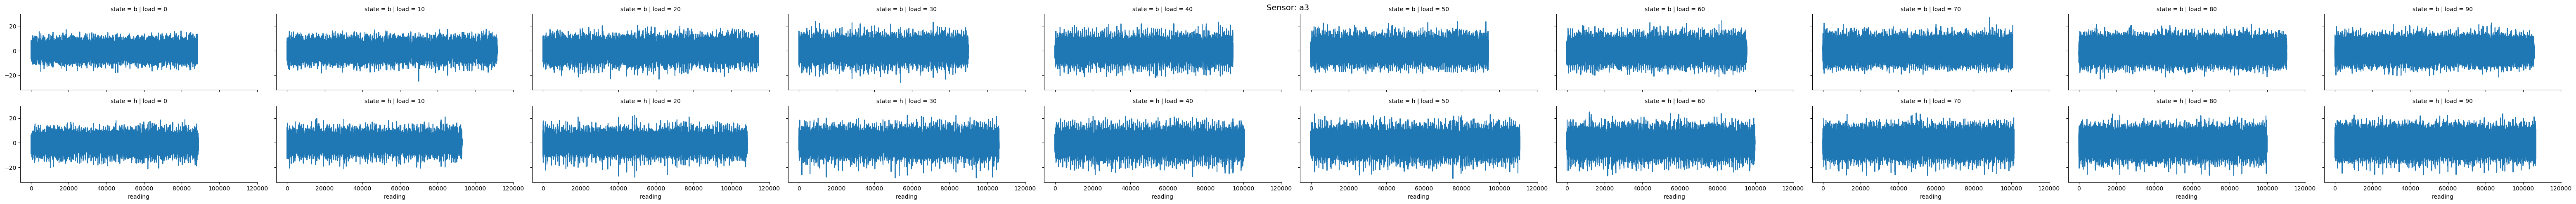

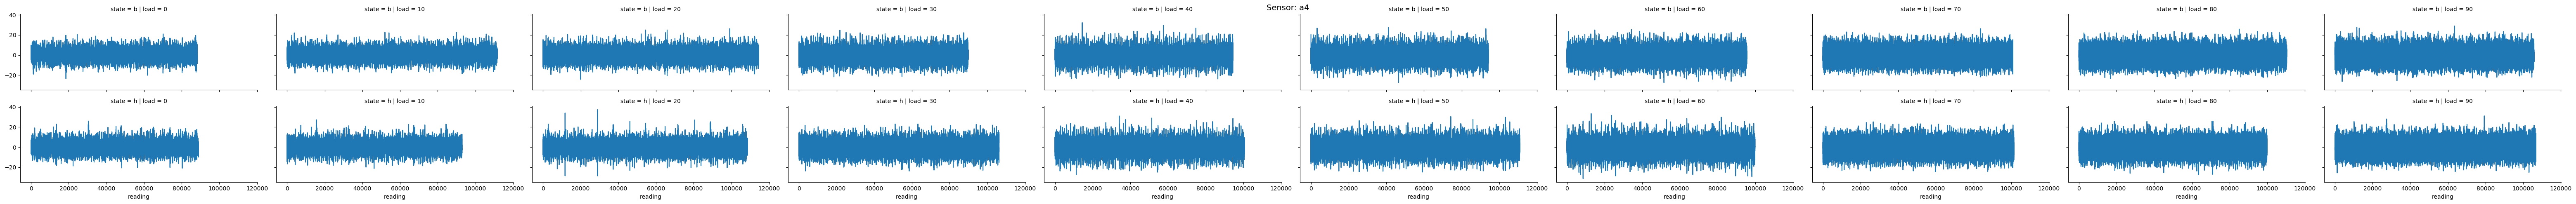

In [14]:
unique_sensors = df['sensor'].unique()

# Define a function to create the FacetGrid for a specific sensor
def create_sensor_grid(sensor):
  # Create a list to store DataFrames for each load level
  sensor_data_by_load = []
  for load in df['load'].unique():
    # Generate data subsets for each load level using rdg function
    sensor_data_by_load.append(rdg(df, load=load, sensor=sensor))

  # Concatenate the DataFrames for all load levels
  all_loads_data = pd.concat(sensor_data_by_load)

  # Create the FacetGrid
  g = sns.FacetGrid(
      data=all_loads_data,
      col='load',
      row='state',
      height=2.5,
      aspect=2.5
  )

  # Map the plot function
  g.map(plt.plot, 'reading')

  # Add a title for the sensor
  g.fig.suptitle(f"Sensor: {sensor}", fontsize=14)
  plt.show()  # Display the grid for this sensor

# Iterate through unique sensors and create FacetGrid for each
for sensor in unique_sensors:
  create_sensor_grid(sensor)
